In [1]:
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
N = 8

In [3]:
h,w = 800, 800

In [4]:
board = np.zeros((h,w), dtype=np.uint8)

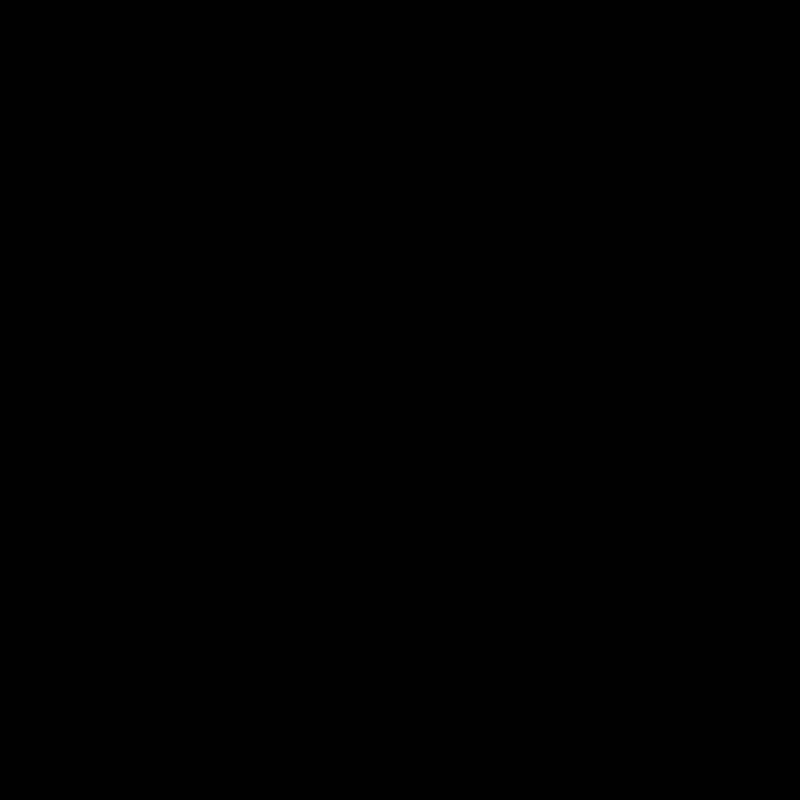

In [5]:
Image.fromarray(board)

In [6]:
board = np.zeros((h,w), dtype=np.uint8)

In [7]:
board = np.zeros((h,w), dtype=np.uint8)
N = 8
box_h, box_w = h // N , w // N

for row in range(N):
    for col in range(N):
        if (row + col) % 2 == 0: 
            board[box_h* row :box_h * (row + 1),box_w * col :box_w * (col + 1)] = 128

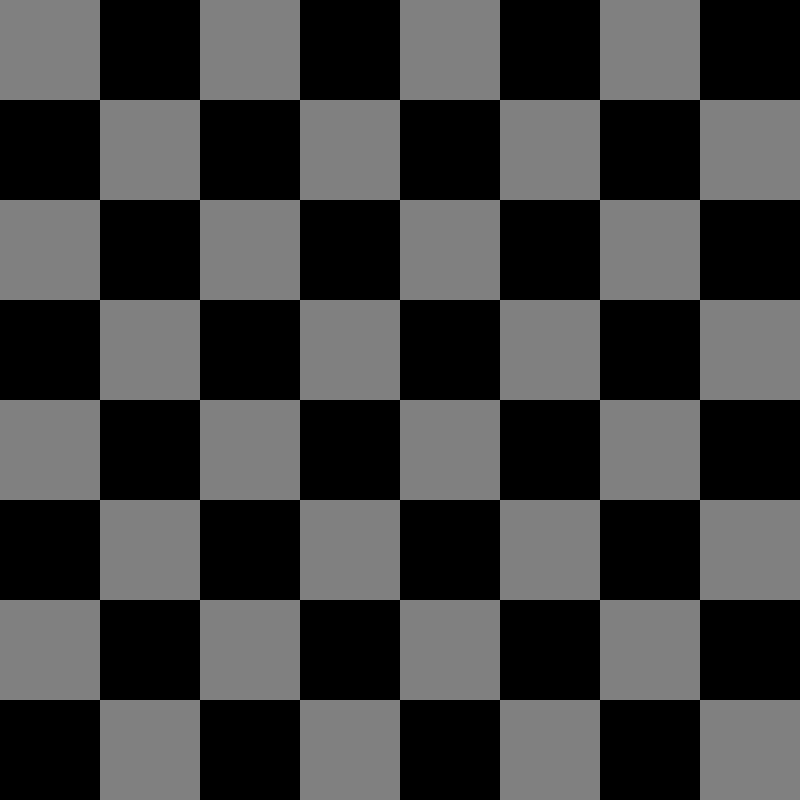

In [8]:
Image.fromarray(board)

In [9]:
queen_path = '../data/queen.png'

In [10]:
queen = cv2.imread(queen_path)
queen = cv2.cvtColor(queen, cv2.COLOR_BGR2GRAY)
_, queen = cv2.threshold(queen, 128, 64, cv2.THRESH_BINARY)
queen = cv2.resize(queen, (box_h,box_w))

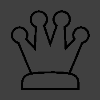

In [11]:
Image.fromarray(queen)

In [12]:
placed_board = np.zeros_like(board)
for row in range(N):
    for col in range(N):
        colored_queen = queen
        if (row + col) % 2 == 0:
            # colored_queen = cv2.bitwise_not(queen)
            pass
        
        board_location = board[box_h* row :box_h * (row + 1),box_w * col :box_w * (col + 1)]
        placed_board[box_h* row :box_h * (row + 1),box_w * col :box_w * (col + 1)] = cv2.bitwise_xor(board_location, queen)


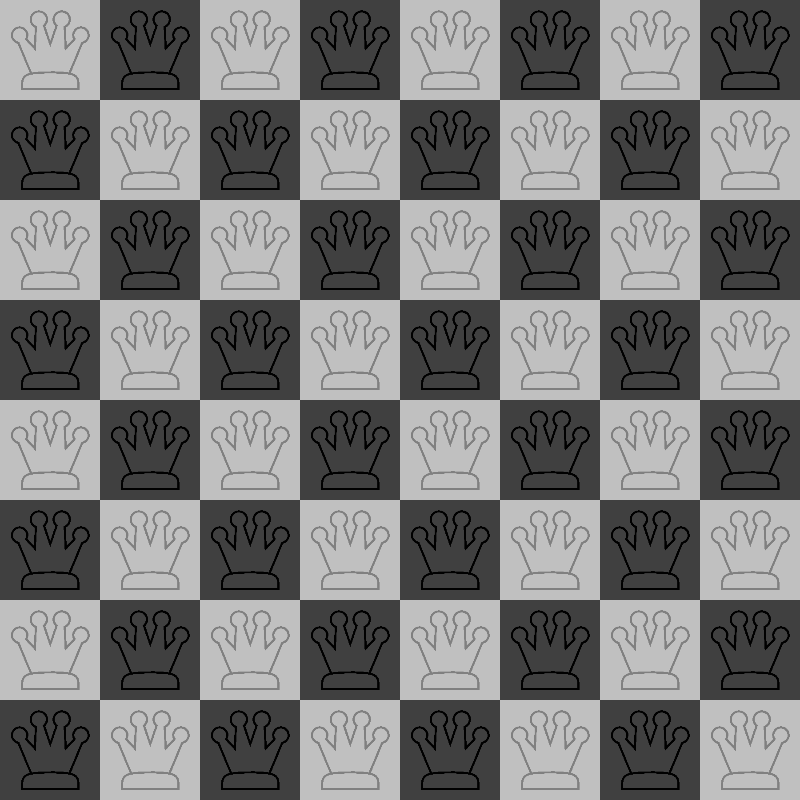

In [13]:
Image.fromarray(placed_board)

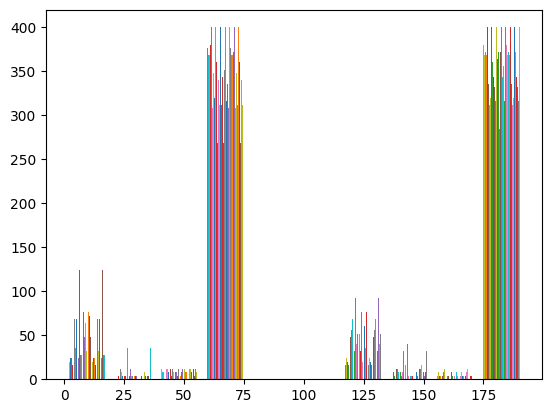

In [14]:
plt.hist(placed_board)
plt.show()

In [15]:
img_after = np.where(placed_board >= 175, 0, placed_board)
img_after = np.where((placed_board >= 100) & (placed_board < 175), 255, img_after)
img_after = np.where((placed_board >= 0) & (placed_board < 60),0,img_after)
img_after = np.where((placed_board >= 60) & (placed_board < 100), 255,img_after)

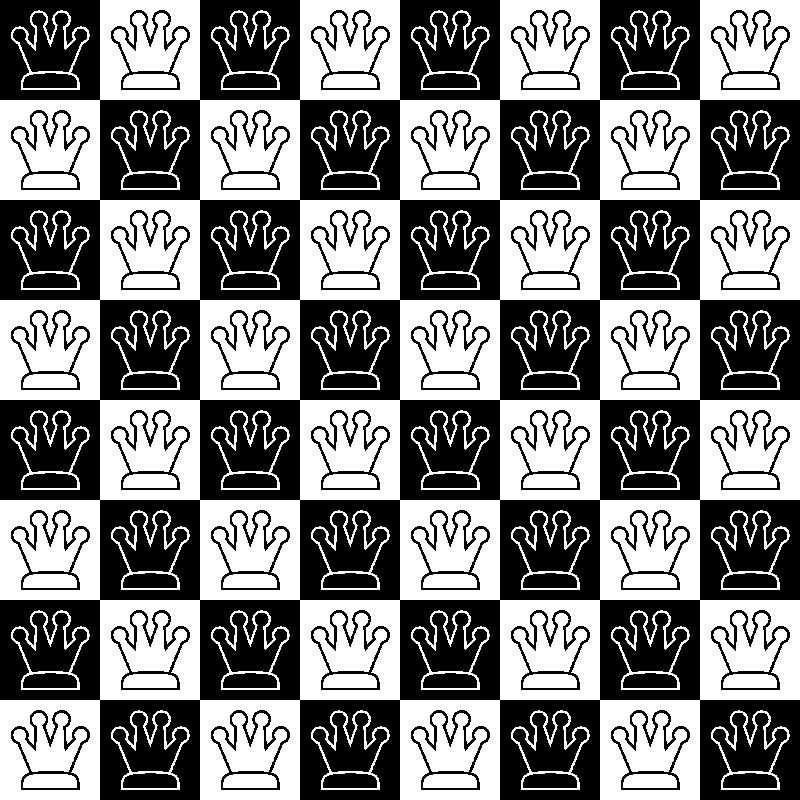

In [16]:
Image.fromarray(img_after)

In [23]:
def place_on_board(board_array, h= 800, w= 800):

    N = len(board_array)
    board_array = N - 1 - board_array

    board = np.zeros((h,w), dtype=np.uint8)

    board = np.zeros((h,w), dtype=np.uint8)
    
    box_h, box_w = h // N , w // N
    
    for row in range(N):
        for col in range(N):
            if (row + col) % 2 == 0: 
                board[box_h* row :box_h * (row + 1),box_w * col :box_w * (col + 1)] = 128


    queen = cv2.imread(queen_path)
    queen = cv2.cvtColor(queen, cv2.COLOR_BGR2GRAY)
    _, queen = cv2.threshold(queen, 128, 255, cv2.THRESH_BINARY)
    queen = cv2.resize(queen, (box_h,box_w))

    mask = queen<255

    placed_board = board.copy()

    for col, row in enumerate(board_array):
        placed_board[box_h* row :box_h * (row + 1),box_w * col :box_w * (col + 1)][mask] = queen[mask]


    _, board_preprocessed = cv2.threshold(placed_board, 0, 255, cv2.THRESH_BINARY)
    
    return board_preprocessed

In [28]:
board_game = np.array([3,2,0,1,4,5,1,8,6,3])
board_test = place_on_board(board_game)

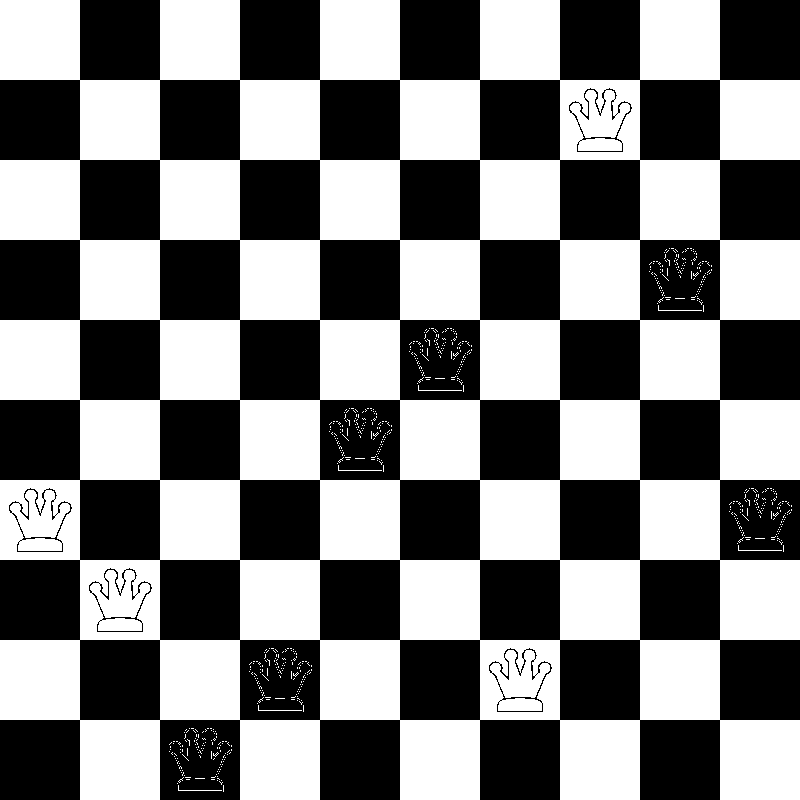

In [29]:
Image.fromarray(board_test)

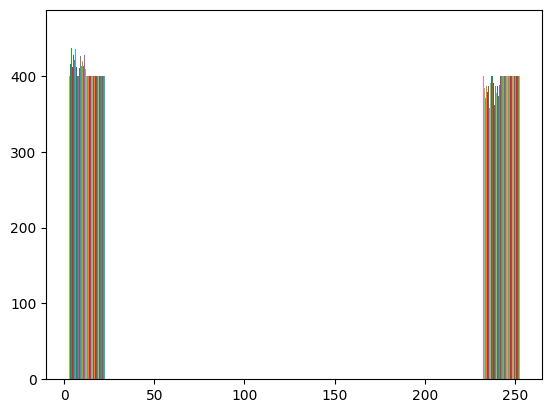

In [20]:
plt.hist(board_test)
plt.show()

In [21]:
_, board_preprocessed = cv2.threshold(board_test, 0, 255, cv2.THRESH_BINARY)

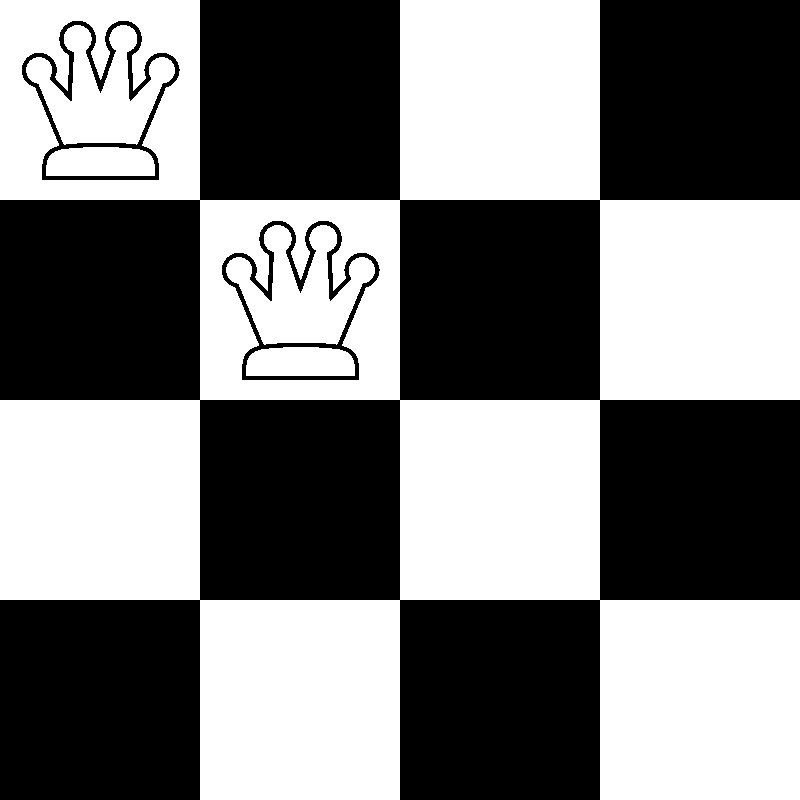

In [22]:
Image.fromarray(board_preprocessed)